# Naive Bayes Implementation

### Importing libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv("Datasets/golf.csv")

In [3]:
data.head()

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


### Exploring data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Windy        14 non-null     bool  
 4   Play         14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [5]:
arr_cols = np.array(data.columns[:-1]).reshape(2,2)
arr_cols

array([['Outlook', 'Temperature'],
       ['Humidity', 'Windy']], dtype=object)

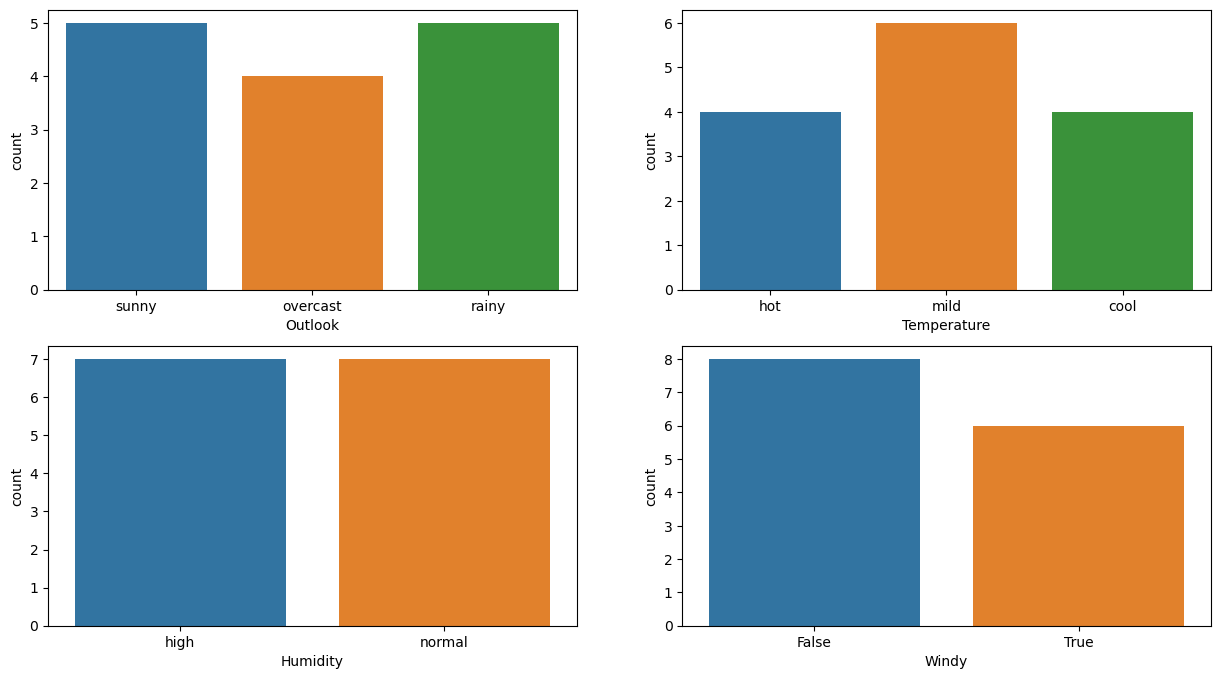

In [6]:
rows, cols = 2,2

fig, axes = plt.subplots(rows, cols, figsize=(15, 8))
for i in range(rows):
    for j in range(cols):
        sns.countplot(ax=axes[i, j], data = data, x = arr_cols[i,j])

In [7]:
data['Play'].value_counts()

yes    9
no     5
Name: Play, dtype: int64

### Building Naive Bayes Classifier from scratch

#### This function will calculate prior probability of the target classes

In [30]:
def prior_prob(data, label=False):
    
    """
        Accepts pandas dataframe, and assumes that target dataset is at the last column.
        Returns the dict of target labels along with their prior probabilities. 
        If `label` parameter is specified, it returns only the prior probability of the specified label.
    """
    
    if isinstance(data, pd.DataFrame):
        if label:
            count = data.iloc[:, -1].value_counts()[label]
            total = data.shape[0]
            return count/total
        else:
            prior_probs = {}
            result = data.iloc[:, -1].value_counts()/data.iloc[:, -1].shape[0]
            for idx in result.index:
                prior_probs[idx] = result[idx]
            return prior_probs
    else:
        print("Please pass dataframe.")
    return
    

In [27]:
prior_prob(data = data, label = 'yes' ), prior_prob(data = data, label = 'no' )

(0.6428571428571429, 0.35714285714285715)

In [31]:
prior_prob(data = data)

{'yes': 0.6428571428571429, 'no': 0.35714285714285715}

#### This function calculates the conditional probability of the supplied dataset feature values

In [11]:
def conditional_probability(dataset, feature, feature_value, label):
    """
        This function accepts pandas dataset, its feature (column), the feature value (datapoint of the column) and label (target)
        of which the conditional probability is to be calculated.
    """
    if isinstance(data, pd.DataFrame):
        if feature in dataset.columns:
            temp_data = dataset.loc[dataset.iloc[:, -1] == label]
            deno = temp_data.shape[0]
            neno = temp_data.loc[temp_data[feature] == feature_value].shape[0]
        else:
            print("Column/Feature not found in the supplied dataset")
            return
    else:
        print("Please pass pandas dataframe to execute this function!")
        return
    return neno/deno

In [12]:
conditional_probability(dataset=data, feature="Windy", feature_value=False, label = "no")

0.4

In [125]:
def conditional_probability_dataset(dataset):
    """
        This function accepts pandas dataset, and returns the conditional probability (likelihood) of each and every column's 
        datapoint with respect to the target variable
    """
    cond_prob_dict = {}
    
    if isinstance(data, pd.DataFrame):
        
        for feature in dataset.columns.to_list()[:-1]:
            cond_prob_dict[feature] = {}
            for feature_value in dataset[feature].unique().tolist():
                cond_prob_dict[feature][feature_value] = {}
                for label in dataset.iloc[:,-1].unique().tolist():

                    temp_data = dataset.loc[dataset.iloc[:, -1] == label]
                    deno = temp_data.shape[0]
                    neno = temp_data.loc[temp_data[feature] == feature_value].shape[0]
                    
                    cond_prob_dict[feature][feature_value][label] = round(neno/deno,3)
 
    else:
        print("Please pass pandas dataframe to execute this function!")
        return
    return cond_prob_dict
    

In [43]:
conditional_probability_dataset(data)

{'Outlook': {'sunny': {'no': 0.6, 'yes': 0.222},
  'overcast': {'no': 0.0, 'yes': 0.444},
  'rainy': {'no': 0.4, 'yes': 0.333}},
 'Temperature': {'hot': {'no': 0.4, 'yes': 0.222},
  'mild': {'no': 0.4, 'yes': 0.444},
  'cool': {'no': 0.2, 'yes': 0.333}},
 'Humidity': {'high': {'no': 0.8, 'yes': 0.333},
  'normal': {'no': 0.2, 'yes': 0.667}},
 'Windy': {False: {'no': 0.4, 'yes': 0.667}, True: {'no': 0.6, 'yes': 0.333}}}

#### Function to use as Naive Bayes classifier

In [126]:
def naive_bayes_classifier(data):
    """
        This function takes the dataset and returns the learned model (prior probabilities 
        and likelihood/conditional probability)
    """
    prior_probs = prior_prob(data)
    conditional_probs = conditional_probability_dataset(data)
    
    return prior_probs, conditional_probs
    

### Using the custom build Naive Bayes Classifier 

In [51]:
nb_model = naive_bayes_classifier(data)

#### The model is basically a tuple, having first value as prior probabilities, and second value as likelihood

In [60]:
nb_model[0]

{'yes': 0.6428571428571429, 'no': 0.35714285714285715}

In [59]:
nb_model[1]

{'Outlook': {'sunny': {'no': 0.6, 'yes': 0.222},
  'overcast': {'no': 0.0, 'yes': 0.444},
  'rainy': {'no': 0.4, 'yes': 0.333}},
 'Temperature': {'hot': {'no': 0.4, 'yes': 0.222},
  'mild': {'no': 0.4, 'yes': 0.444},
  'cool': {'no': 0.2, 'yes': 0.333}},
 'Humidity': {'high': {'no': 0.8, 'yes': 0.333},
  'normal': {'no': 0.2, 'yes': 0.667}},
 'Windy': {False: {'no': 0.4, 'yes': 0.667}, True: {'no': 0.6, 'yes': 0.333}}}

### Writing a function to get predictions

In [65]:
def predictions(model, X_test):
    
    """
        This function accepts the learned model of Naive Bayes Classifier and the test dataset as dataframe, 
        and returns predictions as a list.
    """
    
    preds = []
    label_yes, label_no = [key for key in model[0].keys()]
    prior_prob_yes, prior_prob_no = [value for value in model[0].values()]
    
    if isinstance(X_test, pd.DataFrame):
        for row in range(X_test.shape[0]):
            prob_prod_yes,  prob_prod_no= 1,1
            
            for feature, feature_value in zip(X_test.columns, X_test.iloc[row, :]):
                prob_prod_yes = prob_prod_yes*model[1][feature][feature_value][label_yes]
                prob_prod_no = prob_prod_no*model[1][feature][feature_value][label_no]
                
            prob_prod_yes = prob_prod_yes * prior_prob_yes
            prob_prod_no = prob_prod_no * prior_prob_no
            
            if prob_prod_yes > prob_prod_no:
                preds.append(label_yes)
            else:
                preds.append(label_no)
        
    return preds

In [70]:
y_pred = predictions(nb_model, data.iloc[:,:-1])
print(y_pred)

['no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']


### Evaluating the model

In [71]:
accuracy_score(data.iloc[:,-1], y_pred)

0.9285714285714286

In [79]:
print(classification_report(data.iloc[:,-1], y_pred))

              precision    recall  f1-score   support

          no       1.00      0.80      0.89         5
         yes       0.90      1.00      0.95         9

    accuracy                           0.93        14
   macro avg       0.95      0.90      0.92        14
weighted avg       0.94      0.93      0.93        14



In [74]:
cm = confusion_matrix(data.iloc[:,-1], y_pred)
cm

array([[4, 1],
       [0, 9]], dtype=int64)

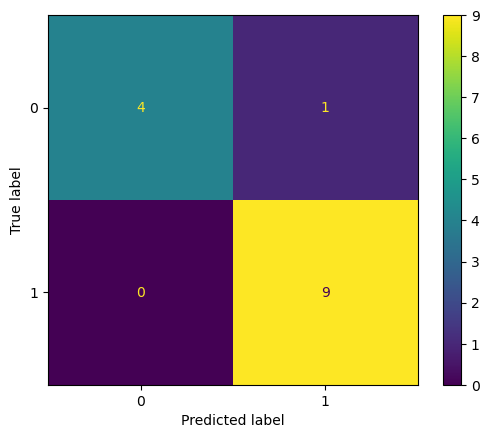

In [77]:
ConfusionMatrixDisplay(cm).plot();

### Implementation of Naive Bayes Classifier using sklearn library

#### Creating two copy of the dataset, one for label encoding and other one for one-hot encoding

In [106]:
data_copy = data.copy()
data_copy_onehot = data.copy()
data_copy

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [96]:
data_copy_onehot

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


#### Label encoding the dataset - "data_copy"

In [107]:
for col in data_copy.columns:
    le = LabelEncoder()
    data_copy[col] = le.fit_transform(data_copy[col])

In [100]:
data_copy

,Outlook,Temperature,Humidity,Windy,Play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [114]:
X, y = data_copy.iloc[:, :-1], data_copy.iloc[:, -1]

#### One hot encoding the dataset - data_copy_onehot (except for target value, which is label encoded)

In [108]:
le = LabelEncoder()
data_copy_onehot['Play'] = le.fit_transform(data_copy_onehot['Play'])

In [109]:
data_copy_onehot = pd.get_dummies(data_copy_onehot, columns = data_copy_onehot.columns[:-1].tolist(), drop_first=True)

In [110]:
data_copy_onehot

,Play,Outlook_rainy,Outlook_sunny,Temperature_hot,Temperature_mild,Humidity_normal,Windy_True
0,0,0,1,1,0,0,0
1,0,0,1,1,0,0,1
2,1,0,0,1,0,0,0
3,1,1,0,0,1,0,0
4,1,1,0,0,0,1,0
5,0,1,0,0,0,1,1
6,1,0,0,0,0,1,1
7,0,0,1,0,1,0,0
8,1,0,1,0,0,1,0
9,1,1,0,0,1,1,0


In [111]:
X_onehot, y_onehot = data_copy_onehot.iloc[:, :-1], data_copy.iloc[:, -1]

#### Creating classification models for both the datasets

In [117]:
model1 = CategoricalNB()
model2 = CategoricalNB()

In [118]:
model1.fit(X,y)
model2.fit(X_onehot,y_onehot)

CategoricalNB()

#### Getting predictions for both the datasets (label encoded as well as one hot encoded ddataset)

In [120]:
y_pred = model1.predict(X)
y_pred_onehot = model2.predict(X_onehot)

#### Evaluation of both the dataset predictions

In [121]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.90      1.00      0.95         9

    accuracy                           0.93        14
   macro avg       0.95      0.90      0.92        14
weighted avg       0.94      0.93      0.93        14



In [122]:
print(classification_report(y_onehot, y_pred_onehot))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



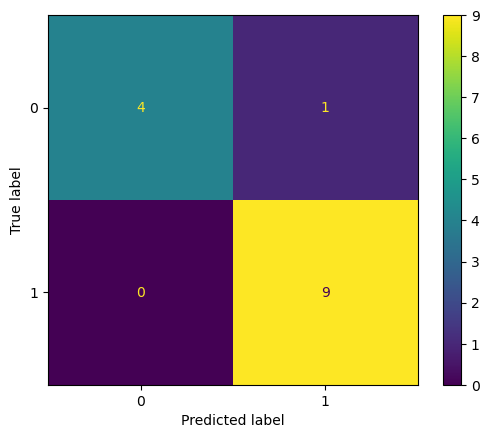

In [123]:
cm = confusion_matrix(y, y_pred)
ConfusionMatrixDisplay(cm).plot();

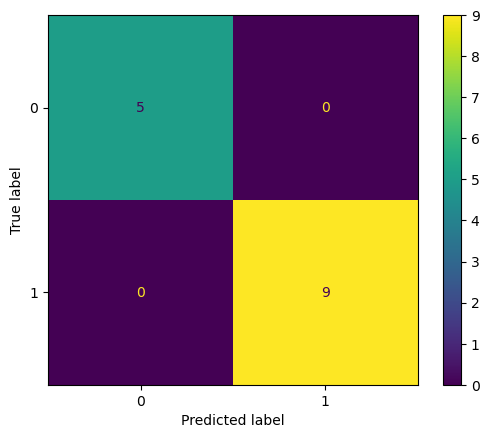

In [124]:
cm = confusion_matrix(y_onehot, y_pred_onehot)
ConfusionMatrixDisplay(cm).plot();

### End of the assignment